Read Original data D

1.1. Apply Association Rule Mining (ARM) algorithm on Original data D to extract the frequent itemsets and their corresponding association rules.


1.2. Filter out the frequent features from the association rules obtained in step 1.1 based on a pre-defined support and confidence threshold.


1.3. Store the filtered association rules in the rules repository R for future use.

for train data = Original train data

for Test data = Original Test data


In [1]:
# For ARM based approach - Points to be noted 
# 1. Date set used/dowloaded from UNSW_NB15_training-set source portal 
# 2. after calculating the correlation between all features, highly coreelated features are droped. 
# 3. Catagorical Data to numarical 
# 3.1 Catagorical Data is coverted to numarical using Labelencoder package 
# 3.2 Methoods to try in parallel are " One-Hot-Encoding " and "Responce Encoding"
# 4.  ARM rules
# 4.1 ARM rules are created -  based on Apriori Algorithm
# 4.2 other methods like FP-Growth ,Eclat , PrefixSpan, Closed frequent itemset mining, Lift need to be implimented for better comparison 
# 5.  Machine Learning Models (LR, RF, linear SVM, Stacking(LR,RF,LSVM),Ensemble_with SVM, AdaBoost, GradiantBoost, XGBoost)
# 5.1 Are applied using Response Coding 
# 5.2 need to try " One-Hot-Encoding " and "Responce Encoding"

# Load Packages and Dataset

In [2]:
#importing libraries and packages that are necessary 
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm import tqdm
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, SelectFromModel, RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

D:\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
D:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#reading training data to understant existing features and dimentions of the same. 
train_data =pd.read_csv("UNSW_NB15_training-set.csv")
print(train_data.shape)
train_data.head(10) #printing the top 10 records 

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.09020,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.00030,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.00510,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.66080,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.00250,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,333333.32150,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,166666.66080,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,35714.28522,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.00000,...,2,2,0,0,0,2,2,1,Normal,0


Rectangle(xy=(-0.4, 0), width=0.8, height=37000, angle=0)
Rectangle(xy=(0.6, 0), width=0.8, height=45332, angle=0)
[    0.   8233.2 16466.4 24699.6 32932.8 41166.  49399.2 57632.4 65865.6
 74098.8 82332. ]


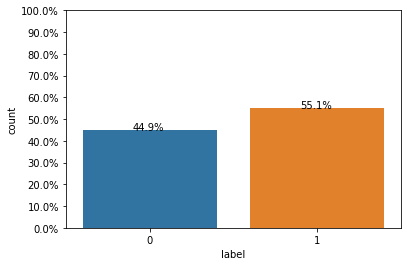

In [4]:
total = len(train_data)*1.
ax=sns.countplot(x="label", data=train_data)
for p in ax.patches:
    print(p)
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.3, p.get_height()+5))

#on y axis  from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
print(ax.yaxis.get_majorticklocs())
# with out changing the position converting to percentage on y axis without changing the positions. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
# plt.savefig('class__feature_label.png')
plt.show()

# ML Process

## Feature Map (Category to Numerical)

In [5]:
print(train_data.shape)
train_data.head()

(82332, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
cat_feature = train_data.select_dtypes(include=['category', object]).columns

In [7]:
from sklearn.preprocessing import LabelEncoder
train_data[cat_feature] = train_data[cat_feature].apply(LabelEncoder().fit_transform)
train_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,6,0


Input Live Data as Test Data

3.1. Collect the live data to be tested and preprocess it to make it compatible with the train data T1.

In [8]:
test_data = pd.read_csv("UNSW_NB15_testing-set.csv")
print(test_data.shape)
test_data.head()

(175341, 45)


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [9]:
cat_feature_test = test_data.select_dtypes(include=['category', object]).columns

In [10]:
test_data[cat_feature_test] = test_data[cat_feature_test].apply(LabelEncoder().fit_transform)
test_data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,6,0
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,6,0
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,6,0
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,6,0
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,6,0


In [11]:
test_data['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

## Correlation map

In [12]:
df_corr = train_data.corr()

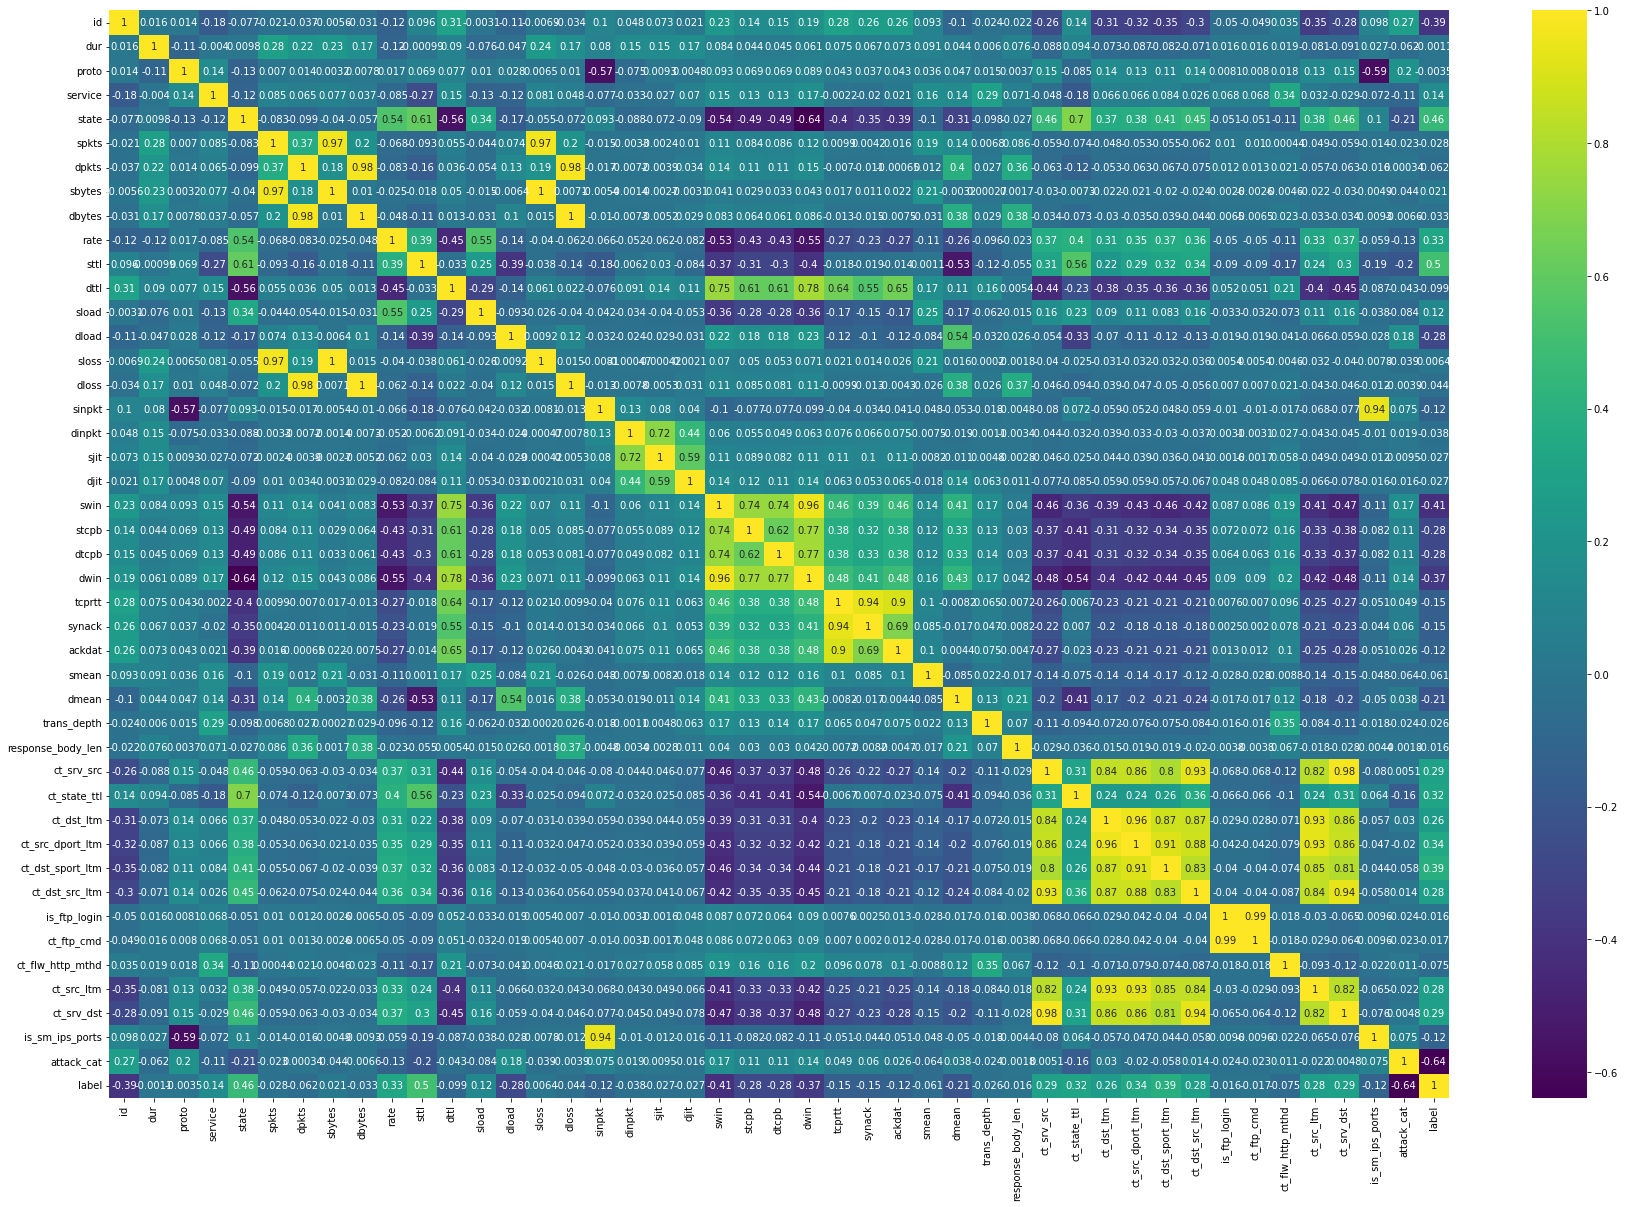

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True, cmap=plt.cm.viridis)
# plt.savefig('correlation_matrix.png')
plt.show()

D:\Anaconda\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
D:\Anaconda\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


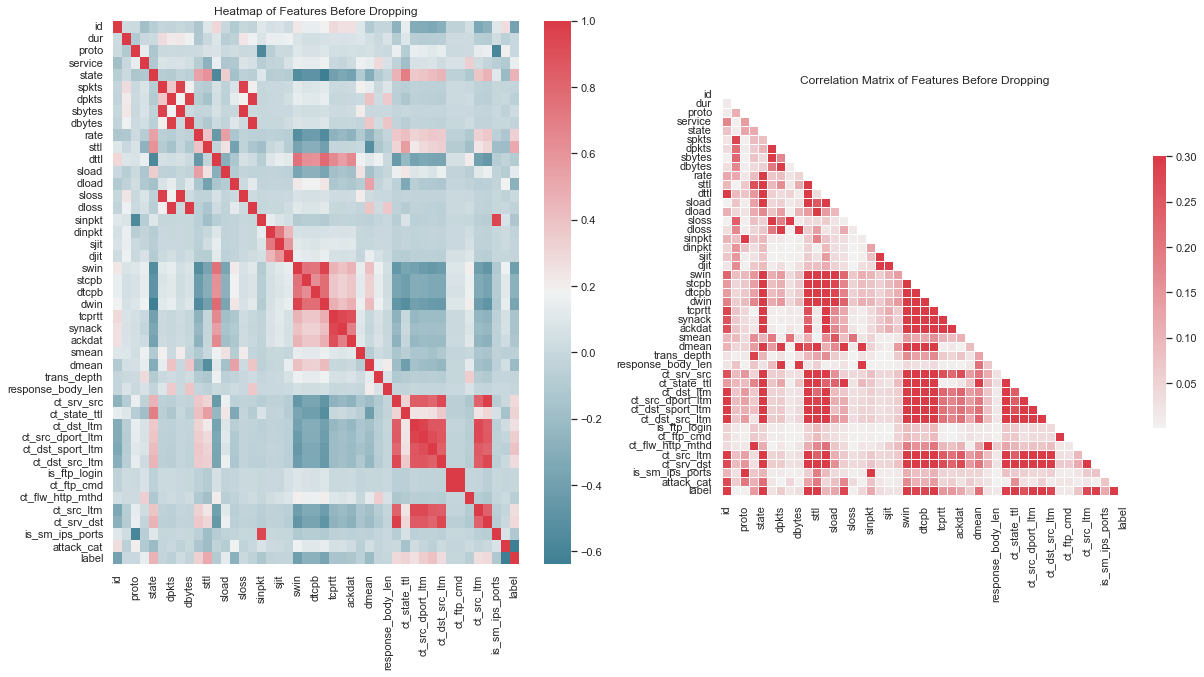

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix
sns.set(style="white")
corr_matrix = train_data.corr().abs()
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(1, 2, figsize=(20, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_data.corr(), cmap=cmap, ax=ax[0])
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[1])
ax[0].set_title('Heatmap of Features Before Dropping')
ax[1].set_title('Correlation Matrix of Features Before Dropping')
plt.show()

Train the Machine and Standardize the data

4.1. Train a machine learning model on the preprocessed D' obtained in step 2.1.

## FS wrapper method (RFE)

In [15]:
X_train = train_data.iloc[:, :-2]
y_train = train_data['label']
X_test = test_data.iloc[:, :-2]
y_test = test_data['label']
column_names = X_train.columns.tolist()

In [16]:
rf = RandomForestClassifier(random_state=1)
rfe = RFE(estimator=rf, n_features_to_select=35, step=1).fit(X_train, y_train)
X_train = rfe.transform(X_train)

In [17]:
indices = rfe.get_support(indices=True)
select_column_names = [column_names[i] for i in indices]
X_train = pd.DataFrame(X_train, columns=select_column_names)
X_train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
0,1.0,0.000011,117.0,0.0,4.0,2.0,0.0,496.0,0.0,90909.090200,...,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
1,2.0,0.000008,117.0,0.0,4.0,2.0,0.0,1762.0,0.0,125000.000300,...,0.0,0.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0
2,3.0,0.000005,117.0,0.0,4.0,2.0,0.0,1068.0,0.0,200000.005100,...,0.0,0.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,3.0
3,4.0,0.000006,117.0,0.0,4.0,2.0,0.0,900.0,0.0,166666.660800,...,0.0,0.0,3.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0
4,5.0,0.000010,117.0,0.0,4.0,2.0,0.0,2126.0,0.0,100000.002500,...,0.0,0.0,3.0,2.0,2.0,2.0,1.0,3.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328.0,0.000005,117.0,0.0,4.0,2.0,0.0,104.0,0.0,200000.005100,...,0.0,0.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
82328,82329.0,1.106101,111.0,0.0,3.0,20.0,8.0,18062.0,354.0,24.410067,...,44.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,2.0
82329,82330.0,0.000000,6.0,0.0,4.0,1.0,0.0,46.0,0.0,0.000000,...,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
82330,82331.0,0.000000,6.0,0.0,4.0,1.0,0.0,46.0,0.0,0.000000,...,0.0,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
X_test = X_test[select_column_names]
X_test

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,dmean,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst
0,1,0.121478,113,0,2,6,4,258,172,74.087490,...,43,0,1,0,1,1,1,1,1,1
1,2,0.649902,113,0,2,14,38,734,42014,78.473372,...,1106,0,43,1,1,1,1,2,1,6
2,3,1.623129,113,0,2,8,16,364,13186,14.170161,...,824,0,7,1,2,1,1,3,2,6
3,4,1.681642,113,3,2,12,12,628,770,13.677108,...,64,0,1,1,2,1,1,3,2,1
4,5,0.449454,113,0,2,10,6,534,268,33.373826,...,45,0,43,1,2,2,1,40,2,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,119,2,3,2,0,114,0,111111.107200,...,0,0,24,2,24,24,13,24,24,24
175337,175338,0.505762,113,0,2,10,8,620,354,33.612649,...,44,0,1,1,1,1,1,2,1,1
175338,175339,0.000009,119,2,3,2,0,114,0,111111.107200,...,0,0,12,2,3,3,3,13,3,12
175339,175340,0.000009,119,2,3,2,0,114,0,111111.107200,...,0,0,30,2,30,30,14,30,30,30


In [19]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [20]:
df_test[df_test.isnull().values==True]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,label


In [21]:
from sklearn import preprocessing
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [22]:
y_train = train_data['label']
y_test = df_test[35]
df_train = df_train.iloc[:, :35]
df_test = df_test.iloc[:, :35]
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

train data shape (82332, 35) (82332,)
test data shape (175341, 35) (175341,)


Apply Classification

5.1. Using the trained machine learning model, classify the preprocessed live data obtained in step 3.1.

Print Accuracy

6.1. Evaluate the accuracy of the classification model on the live data using appropriate metrics such 
as accuracy, precision, recall, and F1-score.

In [ ]:
train_data = pd.read_csv("../dataset/used/UNSW_NB15_training-set.csv")
test_data = pd.read_csv("../dataset/used/UNSW_NB15_testing-set.csv")
cat_feature = train_data.select_dtypes(include=['category', object]).columns
train_data[cat_feature] = train_data[cat_feature].apply(LabelEncoder().fit_transform)
test_data[cat_feature] = test_data[cat_feature].apply(LabelEncoder().fit_transform)
df_train = train_data[select_column_names]
df_test = test_data[select_column_names]

In [ ]:
from sklearn import preprocessing
x = df_train.values
x_test = df_test.values
std_scaler = preprocessing.MinMaxScaler()
std_scaler.fit(x)
x_scaled = std_scaler.transform(x)
df_train = pd.DataFrame(x_scaled)
x_scaled_test = std_scaler.transform(x_test)
df_test = pd.DataFrame(x_scaled_test)

In [ ]:
y_train = train_data['label']
y_test = test_data['label']
print("train data shape", df_train.shape, y_train.shape)
print("test data shape", df_test.shape, y_test.shape)

## ML Models

In [24]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import log_loss, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, Normalizer
from sklearn.ensemble import StackingClassifier
import warnings
warnings.filterwarnings('ignore')

### Logistic Regression Model

In [25]:
#Logistic Regression Model
prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
lr_cfl=GridSearchCV(SGDClassifier(penalty='l2', loss='log', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
lr_cfl.fit(df_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(estimator=SGDClassifier(loss='log', n_jobs=-1), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             verbose=10)

In [26]:
results = pd.DataFrame.from_dict(lr_cfl.cv_results_)
results = results.sort_values(['rank_test_score'])
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
20,0.401812,0.023799,0.015623,0.009880,0.0001,1,5,"{'alpha': 0.0001, 'eta0': 1, 'max_iter': 5}",0.979353,0.997146,0.834143,0.973825,0.782522,0.913398,0.087664,1
10,0.597741,0.065351,0.018732,0.004203,0.0001,0.01,5,"{'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 5}",0.976377,0.997267,0.830742,0.979837,0.775355,0.911916,0.090875,2
22,0.518627,0.028637,0.012503,0.006252,0.0001,1,20,"{'alpha': 0.0001, 'eta0': 1, 'max_iter': 20}",0.979535,0.997146,0.815802,0.971881,0.792239,0.911321,0.088307,3
8,0.939150,0.175986,0.011539,0.006417,0.0001,0.001,50,"{'alpha': 0.0001, 'eta0': 0.001, 'max_iter': 50}",0.979474,0.997146,0.822300,0.973521,0.783858,0.911260,0.089500,4
3,0.983198,0.178076,0.012340,0.003325,0.0001,0.0001,50,"{'alpha': 0.0001, 'eta0': 0.0001, 'max_iter': 50}",0.978988,0.997024,0.829588,0.952569,0.797826,0.911199,0.081470,5


In [27]:
print(lr_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 1, 'max_iter': 5}


In [28]:
logisticR=SGDClassifier(alpha=lr_cfl.best_params_['alpha'],eta0=lr_cfl.best_params_['eta0'], penalty='l2', loss='log', n_jobs = -1, max_iter=lr_cfl.best_params_['max_iter'])
logisticR.fit(df_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(df_train, y_train)
predict_y_tr_lr = sig_clf.predict(df_train)
predict_y_te_lr = sig_clf.predict(df_test)
lr_f1 = f1_score(y_test, predict_y_te_lr)
print(lr_f1)

0.02779009608277901


In [29]:
cm_lr = confusion_matrix(y_test, predict_y_te_lr)

In [30]:
tn, fp, fn, tp = cm_lr.ravel()

In [31]:
fpr_lr = fp/(fp+tn)*100
fnr_lr = fn/(fn+tp)*100
far_lr = (fpr_lr+fnr_lr)/2
print("FAR: %0.2f" %far_lr)

FAR: 49.95


In [32]:
def plot_cm(cm):
    sns.heatmap(cm, annot=True, cmap=sns.light_palette("blue"), fmt="g")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.show()

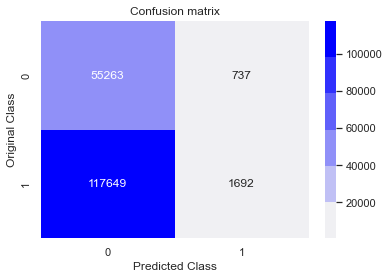

In [33]:
plot_cm(cm_lr)

In [34]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(fpr_tr, tpr_tr,fpr_te, tpr_te):
    '''
    plot the ROC curve for the FPR and TPR value
    '''
    plt.plot(fpr_te, tpr_te, 'k.-', color='orange', label='ROC_test AUC:%.3f'% auc(fpr_te, tpr_te))
    plt.plot(fpr_tr, tpr_tr, 'k.-', color='green', label='ROC_train AUC:%.3f'% auc(fpr_tr, tpr_tr))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

AUC_LR:  0.5005085728979504


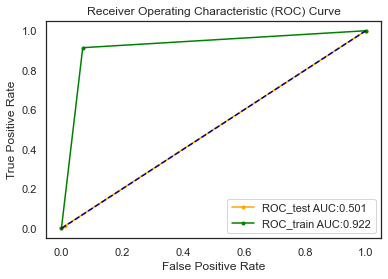

In [35]:
#finding the FPR and TPR for logistic reg model set
fpr_te_lr, tpr_te_lr, t_te_lr = roc_curve(y_test, predict_y_te_lr)
fpr_tr_lr, tpr_tr_lr, t_tr_lr = roc_curve(y_train, predict_y_tr_lr)
auc_te_lr = auc(fpr_te_lr, tpr_te_lr)
print("AUC_LR: ",auc_te_lr)
plot_roc_curve(fpr_tr_lr,tpr_tr_lr,fpr_te_lr, tpr_te_lr)

### Support Vector Machine Model 

In [36]:
# Support Vector Machine Model 

prams={
    'alpha':[10 ** x for x in range(-4, 1)],
     'max_iter':[5, 10, 20, 50, 100],
    'eta0': [10 ** x for x in range(-4, 1)]
}
svm_cfl=GridSearchCV(SGDClassifier(penalty='l1', loss='hinge', n_jobs = -1), param_grid=prams,verbose=10,n_jobs=-1)
svm_cfl.fit(df_train,y_train)


Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(estimator=SGDClassifier(n_jobs=-1, penalty='l1'), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_iter': [5, 10, 20, 50, 100]},
             verbose=10)

In [37]:
print(svm_cfl.best_params_)

{'alpha': 0.0001, 'eta0': 0.0001, 'max_iter': 5}


In [38]:
svm=SGDClassifier(alpha=svm_cfl.best_params_['alpha'],eta0=svm_cfl.best_params_['eta0'], penalty='l2', loss='hinge', n_jobs = -1, max_iter=svm_cfl.best_params_['max_iter'])
svm.fit(df_train,y_train)
sig_clf_svm = CalibratedClassifierCV(svm, method="sigmoid")
sig_clf_svm.fit(df_train, y_train)
predict_y_tr_svm = sig_clf.predict(df_train)
predict_y_te_svm = sig_clf_svm.predict(df_test)
svm_f1 = f1_score(y_test, predict_y_te_svm)
print("F1-Score", svm_f1)

F1-Score 0.027964334389727254


In [39]:
cm_svm = confusion_matrix(y_test, predict_y_te_svm)

In [40]:
tn, fp, fn, tp = cm_svm.ravel()

In [41]:
fpr_svm = fp/(fp+tn)*100
fnr_svm = fn/(fn+tp)*100
far_svm = (fpr_svm+fnr_svm)/2
print("FAR: %0.2f" % far_svm)

FAR: 49.96


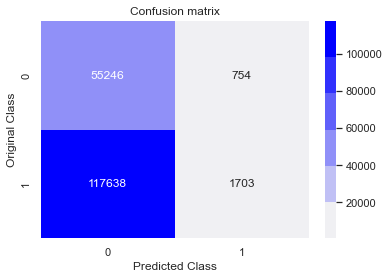

In [42]:
plot_cm(cm_svm)

AUC_SVM:  0.5004028736082797


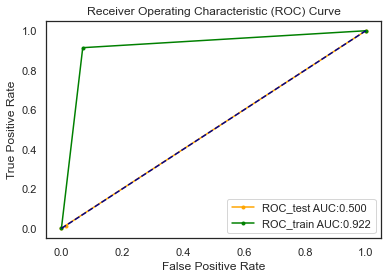

In [43]:
#finding the FPR and TPR for SVM set
fpr_te_svm, tpr_te_svm, t_te_svm = roc_curve(y_test, predict_y_te_svm)
fpr_tr_svm, tpr_tr_svm, t_tr_svm = roc_curve(y_train, predict_y_tr_svm)
auc_te_svm = auc(fpr_te_svm, tpr_te_svm)
print("AUC_SVM: ",auc_te_svm)
plot_roc_curve(fpr_tr_svm,tpr_tr_svm,fpr_te_svm, tpr_te_svm)

### Random Forest Model

In [44]:
# Random Forest Model
param_grid = {"n_estimators": [10,100,500,1000, 2000],
    "min_samples_split": [50, 80, 120, 200],
              "max_depth": [3, 5, 10, 50, 100]}
rfc = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1)
gridCV_rfc = GridSearchCV(rfc, param_grid, cv=3, return_train_score=True, verbose=10, n_jobs=-1)
gridCV_rfc.fit(df_train, y_train)
#grid Search cv results are stored in result for future use
results_rfc = pd.DataFrame.from_dict(gridCV_rfc.cv_results_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [45]:
results_rfc = results_rfc.sort_values(['rank_test_score'])
results_rfc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
27,51.179321,1.021610,8.827126,0.282255,5,80,500,"{'max_depth': 5, 'min_samples_split': 80, 'n_e...",0.962323,0.850022,0.912039,0.908128,0.045930,1,0.991437,0.997814,0.976461,0.988571,0.008950
31,19.315910,0.578144,6.211698,0.331779,5,120,100,"{'max_depth': 5, 'min_samples_split': 120, 'n_...",0.961303,0.850168,0.912367,0.907946,0.045478,2,0.987757,0.998579,0.973164,0.986500,0.010414
37,54.713010,1.105189,12.253851,0.328787,5,200,500,"{'max_depth': 5, 'min_samples_split': 200, 'n_...",0.962688,0.850022,0.909816,0.907509,0.046025,3,0.991729,0.997959,0.975532,0.988407,0.009452
28,98.231613,2.375269,10.377544,0.225527,5,80,1000,"{'max_depth': 5, 'min_samples_split': 80, 'n_e...",0.964437,0.849876,0.908177,0.907496,0.046772,4,0.990563,0.997704,0.974858,0.987708,0.009543
34,194.616245,5.481449,16.805302,0.649265,5,120,2000,"{'max_depth': 5, 'min_samples_split': 120, 'n_...",0.962943,0.849694,0.908614,0.907084,0.046246,5,0.991510,0.997759,0.975113,0.988127,0.009550


In [46]:
print(gridCV_rfc.best_params_)

{'max_depth': 5, 'min_samples_split': 80, 'n_estimators': 500}


In [47]:
rfc= RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=gridCV_rfc.best_params_['max_depth'],min_samples_split=gridCV_rfc.best_params_['min_samples_split'], n_estimators=gridCV_rfc.best_params_['n_estimators'])
rfc.fit(df_train,y_train)
sig_clf_rfc = CalibratedClassifierCV(rfc, method="sigmoid")
sig_clf_rfc.fit(df_train, y_train)
predict_y_tr_rfc = sig_clf_rfc.predict(df_train)
predict_y_te_rfc = sig_clf_rfc.predict(df_test)
rfc_f1 = f1_score(y_test, predict_y_te_rfc)
print(rfc_f1)

0.810841890678236


In [48]:
cm_rfc = confusion_matrix(y_test, predict_y_te_rfc)

In [49]:
tn, fp, fn, tp = cm_rfc.ravel()

In [50]:
fpr_rfc = fp/(fp+tn)*100
fnr_rfc = fn/(fn+tp)*100
far_rfc = (fpr_rfc+fnr_rfc)/2
print("far:",far_rfc)

far: 19.418816847760382


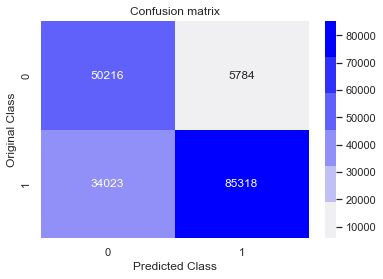

In [51]:
plot_cm(cm_rfc)

AUC_RFC:  0.8058118315223963


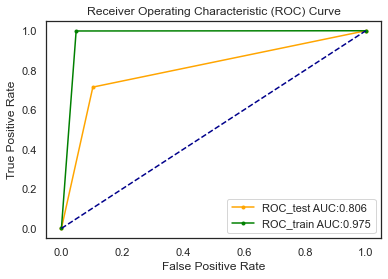

In [52]:
#finding the FPR and TPR for RFC set
fpr_te_rfc, tpr_te_rfc, t_te_rfc = roc_curve(y_test, predict_y_te_rfc)
fpr_tr_rfc, tpr_tr_rfc, t_tr_rfc = roc_curve(y_train, predict_y_tr_rfc)
auc_te_rfc = auc(fpr_te_rfc, tpr_te_rfc)
print("AUC_RFC: ",auc_te_rfc)
plot_roc_curve(fpr_tr_rfc,tpr_tr_rfc,fpr_te_rfc, tpr_te_rfc)

### Stacking classifier (above 3)

In [53]:
#Stacking classifier

clf1 = SGDClassifier(alpha=0.0001,eta0=0.001, penalty='l2', loss='log', n_jobs = -1, max_iter=100)
clf1.fit(df_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=0.0001,eta0=0.01, penalty='l2', loss='hinge', n_jobs = -1, max_iter=100)
clf2.fit(df_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = RandomForestClassifier(criterion='gini', random_state=42, n_jobs=-1, max_depth=50,min_samples_split=50, n_estimators=2000)
clf3.fit(df_train, y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

In [54]:
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
    sclf.fit(df_train, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log loss: %0.3f F1-score: %0.3f" % (i, log_loss(y_test, sclf.predict_proba(df_test)),f1_score(y_test, sclf.predict(df_test))))
    log_error =log_loss(y_test, sclf.predict_proba(df_test))
    if best_alpha > log_error:
        best_alpha = log_error

Stacking Classifer : for the value of alpha: 0.000100 Log loss: 0.793 F1-score: 0.192
Stacking Classifer : for the value of alpha: 0.001000 Log loss: 1.074 F1-score: 0.197
Stacking Classifer : for the value of alpha: 0.010000 Log loss: 1.115 F1-score: 0.243
Stacking Classifer : for the value of alpha: 0.100000 Log loss: 0.999 F1-score: 0.261
Stacking Classifer : for the value of alpha: 1.000000 Log loss: 0.990 F1-score: 0.263
Stacking Classifer : for the value of alpha: 10.000000 Log loss: 0.902 F1-score: 0.606


In [55]:
lr = LogisticRegression(C=10)
sig_clf_sc = StackingClassifier(estimators=[("lr",sig_clf1), ("svm", sig_clf2),("RF", sig_clf3)], final_estimator=lr, n_jobs=-1)
sig_clf_sc.fit(df_train, y_train)
predict_y_tr_sc= sig_clf_sc.predict(df_train)
predict_y_te_sc = sig_clf_sc.predict(df_test)
sc_f1 = f1_score(y_test, predict_y_te_sc)
print(sc_f1)

0.27342997865245355


In [56]:
cm_sc = confusion_matrix(y_test, predict_y_te_sc)

In [57]:
tn, fp, fn, tp = cm_sc.ravel()

In [58]:
fpr_sc = fp/(fp+tn)*100
fnr_sc = fn/(fn+tp)*100
far_sc = (fpr_sc+fnr_sc)/2
print("far:",far_sc)

far: 45.72163682820058


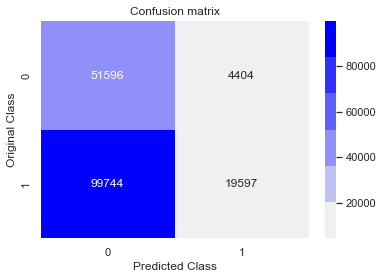

In [59]:
plot_cm(cm_sc)

AUC_SC:  0.5427836317179943


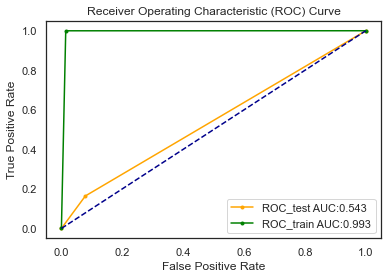

In [60]:
#finding the FPR and TPR for RFC set
fpr_te_sc, tpr_te_sc, t_te_sc = roc_curve(y_test, predict_y_te_sc)
fpr_tr_sc, tpr_tr_sc, t_tr_sc = roc_curve(y_train, predict_y_tr_sc)
auc_te_sc = auc(fpr_te_sc, tpr_te_sc)
print("AUC_SC: ",auc_te_sc)
plot_roc_curve(fpr_tr_sc,tpr_tr_sc,fpr_te_sc, tpr_te_sc)

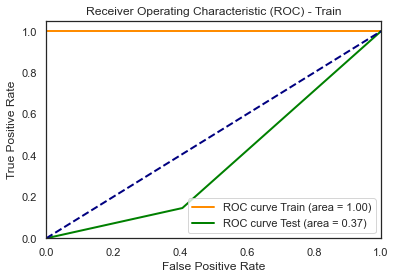

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
ada.fit(df_train, y_train)
y_pred_train = ada.predict(df_train)
y_pred_test = ada.predict(df_test)
# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train1 = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test1 = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_train1)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_test1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()

In [62]:
ada_f1 = f1_score(y_test, y_pred_test)
print(ada_f1)

0.2186262221108047


In [63]:
cm_ada = confusion_matrix(y_test, y_pred_test)

In [64]:
tn, fp, fn, tp = cm_ada.ravel()

In [65]:
fpr_ada = fp/(fp+tn)*100
fnr_ada = fn/(fn+tp)*100
far_ada = (fpr_ada+fnr_ada)/2
print("far:",far_ada)

far: 63.02897606887586


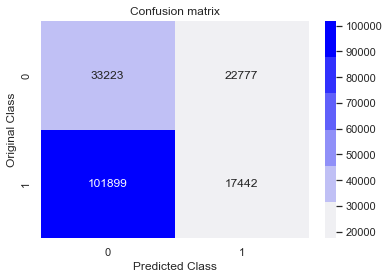

In [66]:
plot_cm(cm_ada)

### Ensemble with SVM

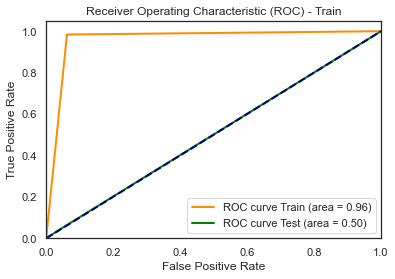

In [67]:
#Ensemble with SVM

from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Initialize the SVM models
svm1 = svm.SVC(kernel='linear', C=1)
svm2 = svm.SVC(kernel='rbf', gamma=0.1, C=1)
svm3 = svm.SVC(kernel='poly', degree=3, C=1)

# Initialize the voting classifier
ensemble = VotingClassifier(estimators=[('linear', svm1), ('rbf', svm2), ('poly', svm3)], voting='hard')

# Train the ensemble model
ensemble.fit(df_train, y_train)

# Make predictions on the test set
y_pred_train = ensemble.predict(df_train)
y_pred_test = ensemble.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()

In [68]:
en_svm_f1 = f1_score(y_test, y_pred_test)
print(en_svm_f1)

0.08071770108412629


In [69]:
cm_en_svm = confusion_matrix(y_test, y_pred_test)

In [70]:
tn, fp, fn, tp = cm_en_svm.ravel()

In [71]:
fpr_en_svm = fp/(fp+tn)*100
fnr_en_svm = fn/(fn+tp)*100
far_en_svm = (fpr_en_svm+fnr_en_svm)/2
print("far:",far_en_svm)

far: 49.894481255394204


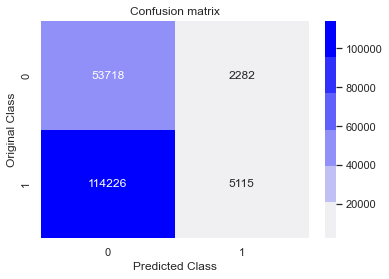

In [72]:
plot_cm(cm_en_svm)

In [73]:
pip install prettytable

Looking in indexes: http://pypi.douban.com/simpleNote: you may need to restart the kernel to use updated packages.


### xgboost Model

Accuracy: 0.2612281212038257


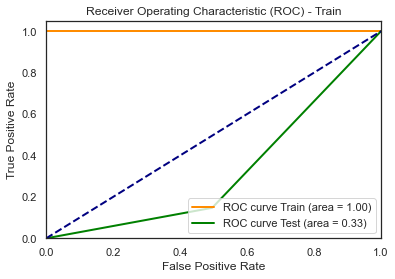

In [74]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Train the model
xgb_model.fit(df_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(df_test)

# Evaluate the accuracy of the model
accuracy = xgb_model.score(df_test, y_test)
print("Accuracy:", accuracy)


# Make predictions on the test set
y_pred_train = xgb_model.predict(df_train)
y_pred_test = xgb_model.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
xg_roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
xg_roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % xg_roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % xg_roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()



In [75]:
xg_f1 = f1_score(y_test, y_pred_test)
print(xg_f1)

0.21336831174509482


In [76]:
cm_xg = confusion_matrix(y_test, y_pred_test)

In [77]:
tn, fp, fn, tp = cm_xg.ravel()

In [78]:
fpr_xg = fp/(fp+tn)*100
fnr_xg = fn/(fn+tp)*100
far_xg = (fpr_xg+fnr_xg)/2
print("far:",far_xg)

far: 67.42886473574524


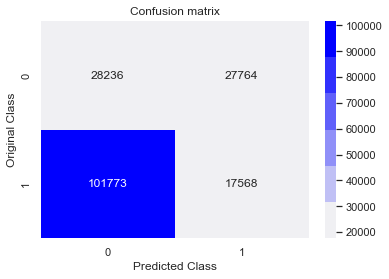

In [79]:
plot_cm(cm_xg)

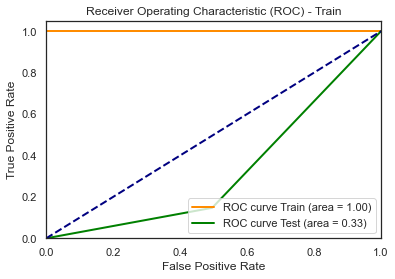

In [80]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create the Gradient Boosting classifier object
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Train the classifier on the training data
clf.fit(df_train, y_train)

# Make predictions on the test set
y_pred_train = clf.predict(df_train)
y_pred_test = clf.predict(df_test)

# Accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
# F1 score
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)

# ROC curve
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
clf_roc_auc_train = auc(fpr_train, tpr_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
clf_roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve Train (area = %0.2f)' % clf_roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='ROC curve Test (area = %0.2f)' % clf_roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Train')
plt.legend(loc="lower right")
plt.show()


In [81]:
clf_f1 = f1_score(y_test, y_pred_test)
print(clf_f1)

0.21336831174509482


In [82]:
cm_clf = confusion_matrix(y_test, y_pred_test)

In [83]:
tn, fp, fn, tp = cm_clf.ravel()

In [84]:
fpr_clf = fp/(fp+tn)*100
fnr_clf = fn/(fn+tp)*100
far_clf = (fpr_clf+fnr_clf)/2
print("far:",far_clf)

far: 67.42886473574524


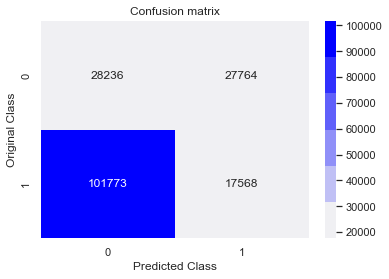

In [85]:
plot_cm(cm_clf)

In [86]:
'''''
from sklearn.metrics import accuracy_score, confusion_matrix

# Get the unique attack categories in the test set
attack_categories = df_test[22].unique()

for category in attack_categories:
    # Filter the test set to include only samples from the current attack category
    category_mask = df_test[22] == category
    df_category_test = df_test[category_mask]
    y_category_test = y_test[category_mask]
    
    # Make predictions on the filtered test set using the trained classifier
    y_category_pred = clf.predict(df_category_test)
    
    # Compute the accuracy and FAR for the current attack category
    category_accuracy = accuracy_score(y_category_test, y_category_pred)
    tn, fp, fn, tp = confusion_matrix(y_category_test, y_category_pred).ravel()
    fpr = fp/(fp+tn)
    fnr = fn/(fn+tp)
    far = (fpr + fnr) / 2
    
    # Print the results for the current attack category
    print(f"Attack category: {category}")
    print(f"Accuracy: {category_accuracy:.4f}")
    print(f"FAR: {far:.4f}")
    print()
'''''

'\'\'\nfrom sklearn.metrics import accuracy_score, confusion_matrix\n\n# Get the unique attack categories in the test set\nattack_categories = df_test[22].unique()\n\nfor category in attack_categories:\n    # Filter the test set to include only samples from the current attack category\n    category_mask = df_test[22] == category\n    df_category_test = df_test[category_mask]\n    y_category_test = y_test[category_mask]\n    \n    # Make predictions on the filtered test set using the trained classifier\n    y_category_pred = clf.predict(df_category_test)\n    \n    # Compute the accuracy and FAR for the current attack category\n    category_accuracy = accuracy_score(y_category_test, y_category_pred)\n    tn, fp, fn, tp = confusion_matrix(y_category_test, y_category_pred).ravel()\n    fpr = fp/(fp+tn)\n    fnr = fn/(fn+tp)\n    far = (fpr + fnr) / 2\n    \n    # Print the results for the current attack category\n    print(f"Attack category: {category}")\n    print(f"Accuracy: {category_a

## Model Evaluation

In [87]:
#Model Evaluation
import prettytable
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "F1 Score", "AUC","FPR %","FNR %","FAR %"]
#x.add_row(["Logistic Regression", "{0:.4}".format(lr_f1), "{0:.4}".format(auc_te_lr),"%.2f" % float(fpr_lr),"%.2f" % float(fnr_lr),"%.2f" % float(far_lr)])
#x.add_row(["Linear SVM", "{0:.4}".format(svm_f1), "{0:.4}".format(auc_te_svm),"%.2f" % float(fpr_svm),"%.2f" % float(fnr_svm),"%.2f" % float(far_svm)])
#x.add_row(["Random Forest", "{0:.4}".format(rfc_f1), "{0:.4}".format(auc_te_rfc),"%.2f" % float(fpr_rfc),"%.2f" % float(fnr_rfc),"%.2f" % float(far_rfc)])
x.add_row(["Stacking Classifier with (LR,SVM, RF)", "{0:.4}".format(sc_f1), "{0:.4}".format(auc_te_sc),"%.2f" % float(fpr_sc),"%.2f" % float(fnr_sc),"%.2f" % float(far_sc)])
x.add_row(["Ensemble with SVM", "{0:.4}".format(en_svm_f1), "{0:.4}".format(roc_auc_test),"%.2f" % float(fpr_en_svm),"%.2f" % float(fnr_en_svm),"%.2f" % float(far_en_svm)])
x.add_row(["AdaBoost classifier with Decision Tree", "{0:.4}".format(ada_f1), "{0:.4}".format(roc_auc_test1),"%.2f" % float(fpr_ada),"%.2f" % float(fnr_ada),"%.2f" % float(far_ada)])
x.add_row(["Gradient Boosting classifier", "{0:.4}".format(clf_f1), "{0:.4}".format(clf_roc_auc_test),"%.2f" % float(fpr_clf),"%.2f" % float(fnr_clf),"%.2f" % float(far_clf)])
x.add_row(["XGBoost classifier (ext of GBoost )", "{0:.4}".format(xg_f1), "{0:.4}".format(xg_roc_auc_test),"%.2f" % float(fpr_xg),"%.2f" % float(fnr_xg),"%.2f" % float(far_xg)])
print(x)


+----------------------------------------+----------+--------+-------+-------+-------+
|                 Model                  | F1 Score |  AUC   | FPR % | FNR % | FAR % |
+----------------------------------------+----------+--------+-------+-------+-------+
| Stacking Classifier with (LR,SVM, RF)  |  0.2734  | 0.5428 |  7.86 | 83.58 | 45.72 |
|           Ensemble with SVM            | 0.08072  | 0.5011 |  4.08 | 95.71 | 49.89 |
| AdaBoost classifier with Decision Tree |  0.2186  | 0.3697 | 40.67 | 85.38 | 63.03 |
|      Gradient Boosting classifier      |  0.2134  | 0.3257 | 49.58 | 85.28 | 67.43 |
|  XGBoost classifier (ext of GBoost )   |  0.2134  | 0.3257 | 49.58 | 85.28 | 67.43 |
+----------------------------------------+----------+--------+-------+-------+-------+
